# Guassian Mixture

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final/past_ten_seasons/data/cleaned.csv")

In [68]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

X = df[['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'FG%', '2P%',
       '3P%', 'FT%', 'TS%', 'eFG%']]

# X = df[['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS']]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the selected variables
X_scaled = scaler.fit_transform(X)

In Guassian Mixture models, a different approach is taken where each cluster has a mean and variance. We can also use a different parameter to find the optimal clusters.

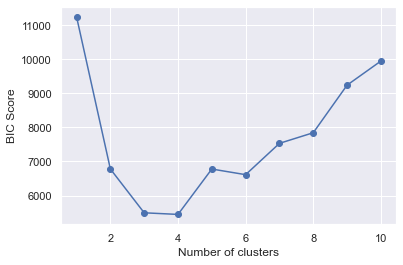

In [69]:
n_clusters = np.arange(1, 11)
bic_scores = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

plt.plot(n_clusters, bic_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = n_clusters[np.argmin(bic_scores)]

# optimal_n_clusters = n_clusters[4]

Now we fit based off of the optimal clusters.

In [80]:
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42)
gmm.fit(X_scaled)
# cluster_labels_train = gmm.predict(X_train_pca)

GaussianMixture(n_components=4, random_state=42)

In [81]:
# Get cluster labels for each observation
cluster_labels = gmm.predict(X_scaled)

In [82]:
# cluster_labels_test = gmm.predict(X_test_pca)

We can make the same charts as we did for kmeans.

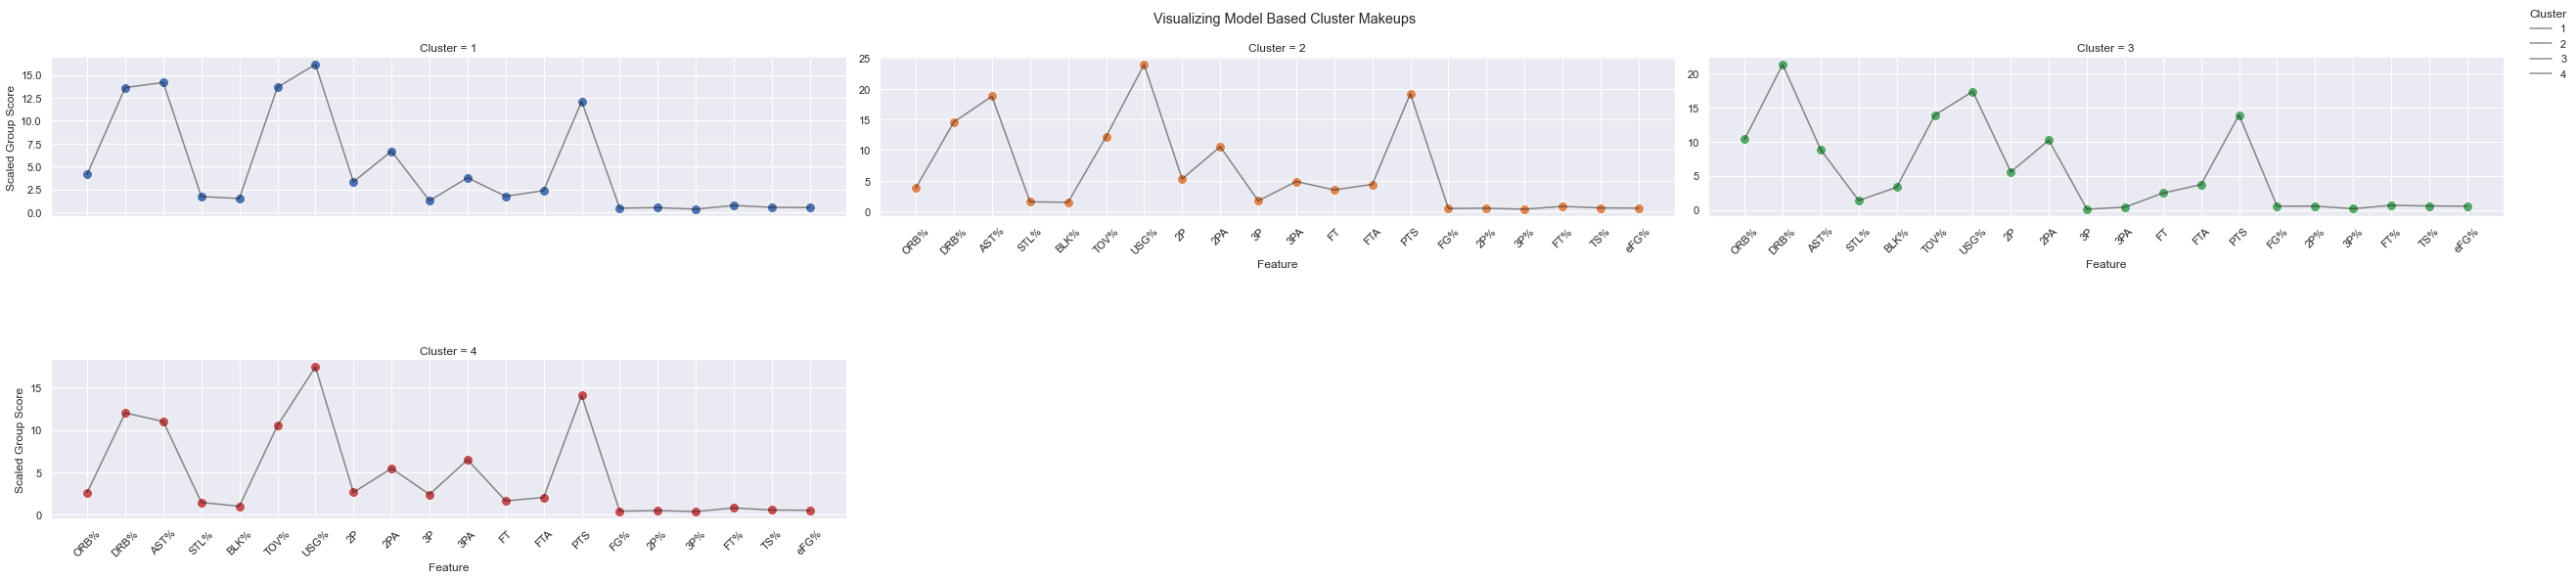

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get cluster centers and convert them back to the original scale
cluster_centers = scaler.inverse_transform(gmm.means_)

# Create a DataFrame with cluster centers and features
centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
centers_df['Cluster'] = centers_df.index + 1  # Add cluster labels starting from 1

# Melt the DataFrame into a long format for easier plotting
centers_melted = centers_df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Plot the MBC centers for each cluster
g = sns.FacetGrid(centers_melted, col='Cluster', col_wrap=3, hue='Cluster', palette='deep', sharey=False, height=4, aspect=3)
g.map_dataframe(sns.scatterplot, x='Feature', y='Value', s=100)
g.map_dataframe(sns.lineplot, x='Feature', y='Value', color='k', alpha=0.5)
g.set_xticklabels(rotation=45)

g.set_axis_labels("Feature", "Scaled Group Score")
g.fig.subplots_adjust(top=0.9, hspace=0.9)
g.fig.suptitle("Visualizing Model Based Cluster Makeups")
g.add_legend(title='Cluster', loc='upper right')

And get the player names for each cluster as well.

In [84]:
# Add cluster labels to the original DataFrame
df['Cluster (Gaussian)'] = cluster_labels

# View the players in each cluster
for i in range(optimal_n_clusters):
    print(f"Players in Cluster {i+1}:")
    print(df[df['Cluster (Gaussian)'] == i]['Player'].values)
    print()

Players in Cluster 1:
['Paul Zipser' 'Delon Wright' 'Nate Wolters' 'Justise Winslow'
 'Patrick Williams' 'Mo Williams' 'Kenrich Williams' 'Elliot Williams'
 'Aaron Wiggins' 'Isaiah Whitehead' 'C.J. Watson' 'Trendon Watford'
 'Brad Wanamaker' 'Gerald Wallace' 'Ish Wainright' 'Noah Vonleh'
 'Rashad Vaughn' 'Greivis Vásquez' 'Tyler Ulis' 'Beno Udrih' 'Evan Turner'
 'P.J. Tucker' 'Juan Toscano-Anderson' 'Obi Toppin' 'Matisse Thybulle'
 'JT Thor' 'Lance Thomas' 'Daniel Theis' 'Jeff Taylor' "Jae'Sean Tate"
 'Isaiah Stewart' 'Lamar Stevens' 'Lance Stephenson' 'Omari Spellman'
 'Ish Smith' 'Marcus Smart' 'Donald Sloan' 'Kyle Singler' 'Wayne Selden'
 'Thabo Sefolosha' 'Tomáš Satoranský' 'JaKarr Sampson' 'John Salmons'
 'Brandon Rush' 'Ricky Rubio' 'Rajon Rondo' 'Isaiah Roby'
 'Jeremiah Robinson-Earl' 'Glenn Robinson III' 'Brian Roberts'
 'Andre Roberson' 'Austin Rivers' 'Luke Ridnour' 'Austin Reaves'
 'Tayshaun Prince' 'Pablo Prigioni' 'Ronnie Price' 'A.J. Price'
 'Phil Pressey' 'Aleksej Pokuse

And again, make the same visualizations.

In [85]:
features = ['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'FG%', '2P%',
       '3P%', 'FT%', 'TS%', 'eFG%']

mean_values = df.groupby('Cluster (Gaussian)')[features].mean()

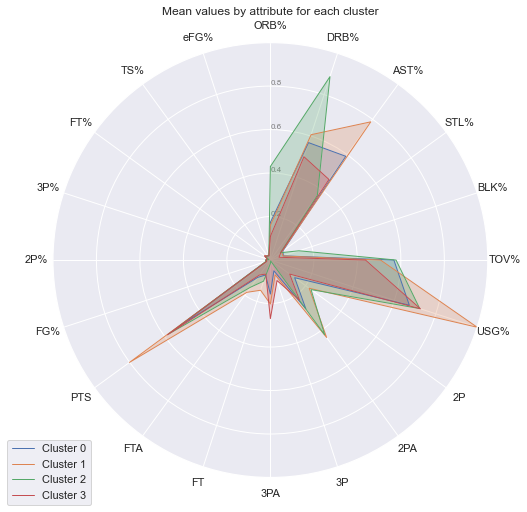

In [86]:
from math import pi

def create_radar_chart(mean_values, features, clusters):
    # Set the number of variables and calculate the angle for each axis
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    # Set the radar chart figure
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Set the first axis on top and move clockwise
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines and labels
    plt.xticks(angles[:-1], features)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="gray", size=8)
    plt.ylim(0, 1)

    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the radar chart for each cluster
    for i in range(clusters):
        values = normalized_values.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {i}")
        ax.fill(angles, values, alpha=0.25)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Mean values by attribute for each cluster")
    plt.show()

# Call the function to create the radar chart
create_radar_chart(mean_values, features, optimal_n_clusters)

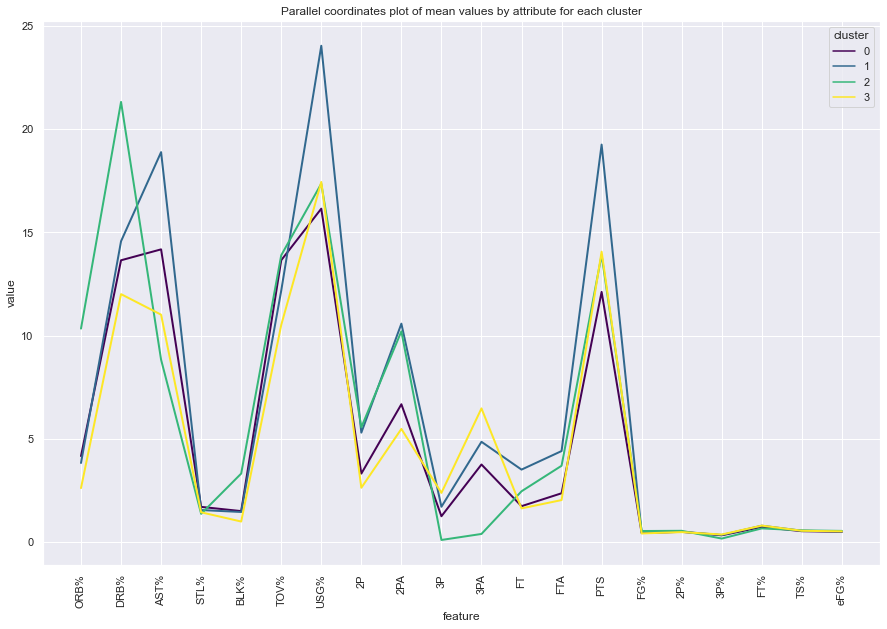

In [87]:
def create_parallel_coordinates_plot(mean_values, features, clusters):
    # Create a new DataFrame with the cluster labels and mean values
    mean_values['cluster'] = mean_values.index
    mean_values = mean_values.reset_index(drop=True)

    # Plot the parallel coordinates plot
    plt.figure(figsize=(15, 10))
    sns.set(style="darkgrid")
    sns.lineplot(data=pd.melt(mean_values, 'cluster', var_name='feature', value_name='value'), x='feature', y='value', hue='cluster', palette='viridis', linewidth=2)
    plt.title("Parallel coordinates plot of mean values by attribute for each cluster")
    plt.xticks(rotation=90)
    plt.show()

    # Call the function to create the parallel coordinates plot
create_parallel_coordinates_plot(mean_values, features, optimal_n_clusters)

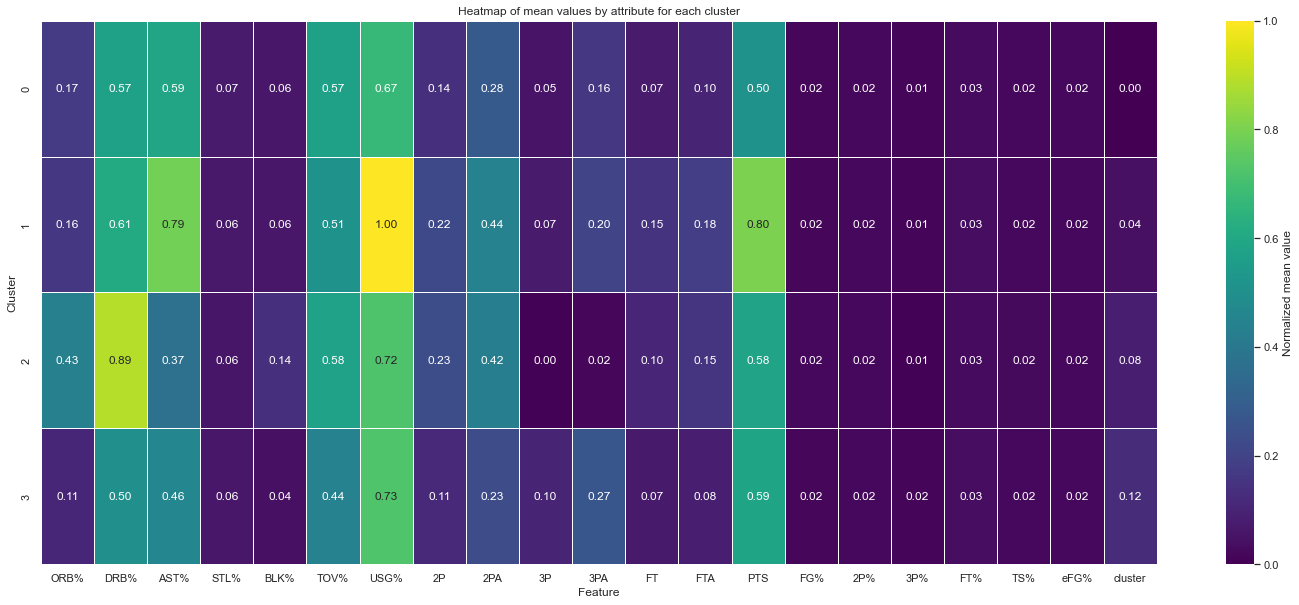

In [88]:
def create_heatmap(mean_values, features, clusters):
    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(normalized_values, cmap="viridis", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Normalized mean value'})
    plt.title("Heatmap of mean values by attribute for each cluster")
    plt.xlabel("Feature")
    plt.ylabel("Cluster")
    plt.show()

# Call the function to create the heatmap
create_heatmap(mean_values, features, optimal_n_clusters)

Next we try this again with dimension reduction.

Conclusions in README.